<a href="https://colab.research.google.com/github/sourabh9854/MACHINE-LEARNING/blob/main/oultlier_zscore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("placement.csv")

In [ ]:
data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [ ]:
data.shape

(1000, 3)

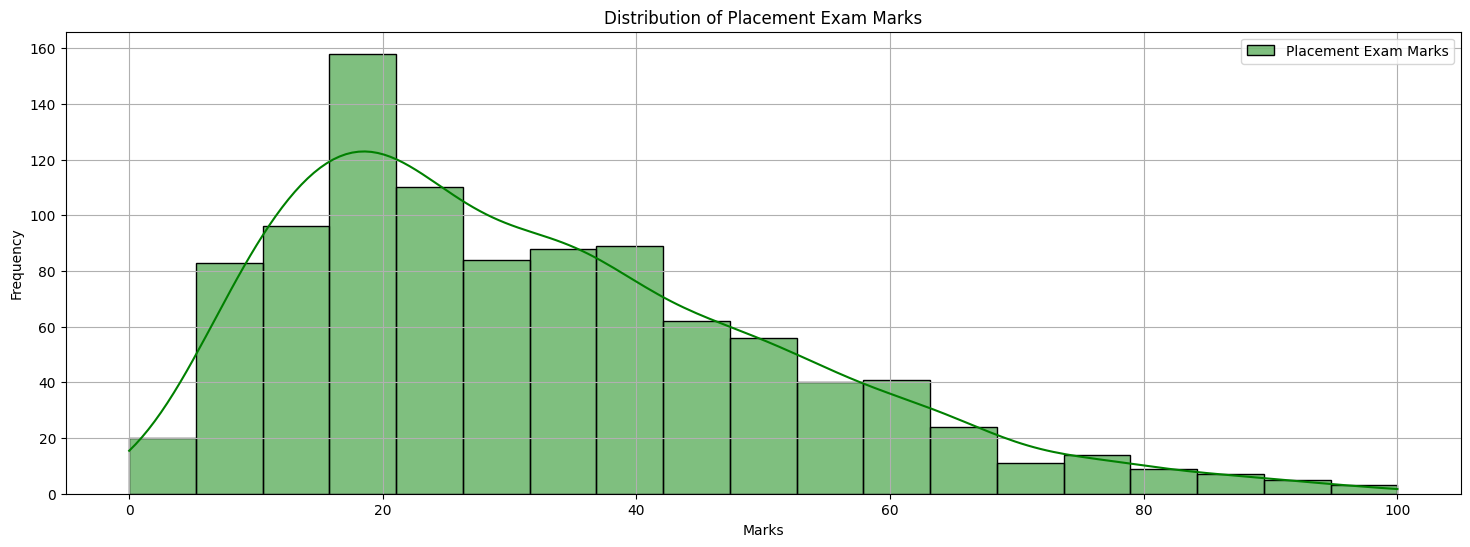

In [40]:
plt.figure(figsize=(18, 6))
sns.histplot(data['placement_exam_marks'], kde=True, color='green', label='Placement Exam Marks')
plt.title('Distribution of Placement Exam Marks')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

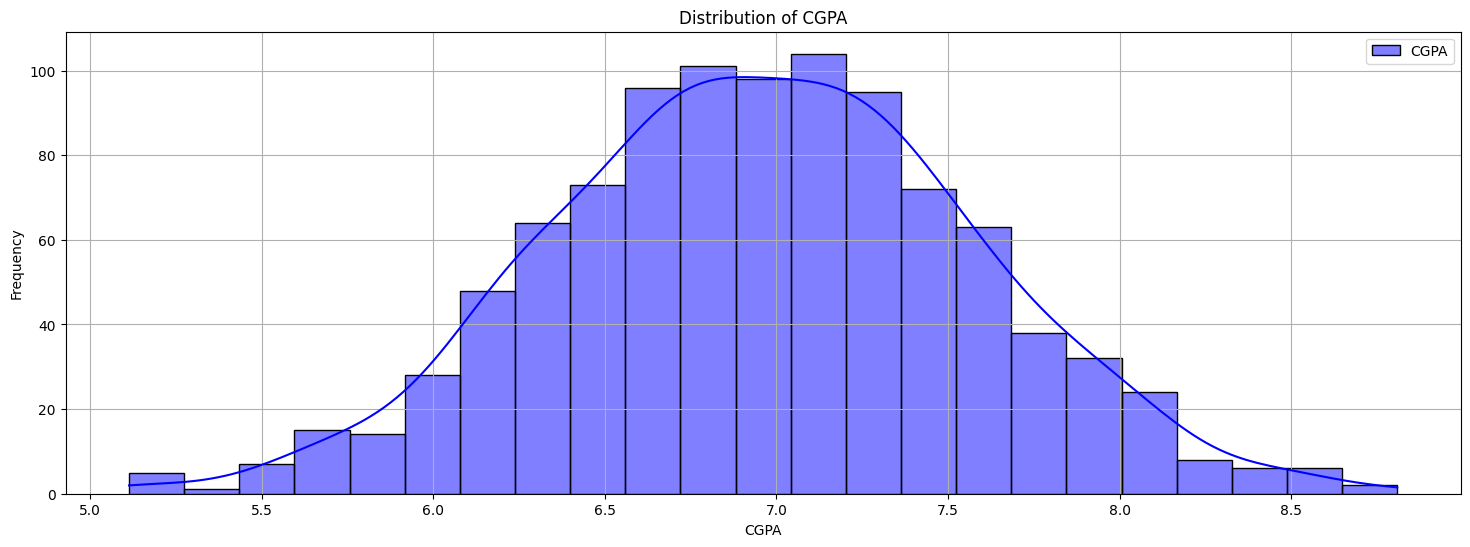

In [41]:
# Plot for CGPA
plt.figure(figsize=(18, 6))
sns.histplot(data['cgpa'], kde=True, color='blue', label='CGPA')
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# **As observed in the visualizations above, the 'CGPA' column exhibits a  normal distribution, while the 'placement_exam_marks' column displays a slight right-skewed nature.so we will proceed with "cgpa" column **

In [ ]:
#finding the boundary values
upper_limit = data['cgpa'].mean() + 3* data['cgpa'].std()
lower_limit = data['cgpa'].mean() - 3* data['cgpa'].std()

In [ ]:
print("upper acceptable value :",upper_limit)
print("lower acceptable value :" ,lower_limit)


upper acceptable value : 8.808933625397168
lower acceptable value : 5.113546374602832


In [ ]:
# find outliers in the 'cgpa' column
outliers = data[(data['cgpa'] < lower_limit) | (data['cgpa'] > upper_limit)]

In [ ]:
outliers

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# **Trimming**

In [ ]:
new_data = data[(data['cgpa'] > lower_limit) & (data['cgpa'] < upper_limit)]
new_data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [ ]:
new_data.shape

(995, 3)

# **Capping**

In [ ]:
data['cgpa'] = np.where(
    data['cgpa'] >upper_limit,
    upper_limit,
    np.where(
    data['cgpa'] <lower_limit,
    lower_limit,
    data['cgpa']
    )
)

In [ ]:
data[(data['cgpa'] < lower_limit) | (data['cgpa'] > upper_limit)]
# no outlier found when we are checking for oulier after capping

,cgpa,placement_exam_marks,placed


In [ ]:
data.shape

(1000, 3)